# Ford GoBike Exploration
## by Seif Abdelghany

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area and represents trips taken by members of the service for month of February of 2019.


# Content
[Data Cleanning](#data_cleanning)<br>
[Feature Engineering](#feature_engineering)<br>
[Univariate Exploration](#univariate_exploration)<br>
[Bivariate Exploration](#bivariate_exploration)<br>
[Multivariate Exploration](#multivariate_exploration)<br>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load dataset and view
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape[0]

183412

### Questions
<br>
1. Who are Ford GoBike’s customers? (w.r.t Deomgraphics)
   measure the gender and age <br>
    a. who use it most male or female?
2. When is the service often used? (weekdays vs. weekends) 
3. What is the average duration of each ride? 
5. What are the characteristics of Customers vs. Subscribers? 
7. Which are the famous starting and destination station? 
8. Which are the famous routes? 
9. What time of the day do users use this service? 


### What is the structure of your dataset?

> it has 16 columns with 183412 rows 

### What is/are the main feature(s) of interest in your dataset?
>When are most trips taken in terms of time of day, day of the week and day type (Weekday or Weekend)?<br>
How long does the average trip take?<br>
Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* Duration
* Start and End Time
* User type
* Gender 
* Birth year

<a id='data_cleanning'></a>

# Data Cleanning

1. **I will remove following columns(langtitude and latitude, end and start station id, bike share for all trip)**
2. The data type of start_time and end_time need to be chaged from object to datetime
3. The data type of user_type , and member_gender need to be chaged to catagory
4. Some values in the member_birth_year are before 1900 which more than 100 years
5. Calculate the age for each member and store it in new column called age
6. Splite the date column into day and hour.
7. member_birth_year need to be changed to int
8. make a new column for duration in minutes
9. start_time and end time to days and make them categorical weekday and weekend 

### Drop Unwanted columns

In [4]:
bike = df.drop(columns=['start_station_id','start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip'], axis=1)
bike.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,NaN,NaN
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   duration_sec        183412 non-null  int64  
 1   start_time          183412 non-null  object 
 2   end_time            183412 non-null  object 
 3   start_station_name  183215 non-null  object 
 4   end_station_name    183215 non-null  object 
 5   bike_id             183412 non-null  int64  
 6   user_type           183412 non-null  object 
 7   member_birth_year   175147 non-null  float64
 8   member_gender       175147 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 12.6+ MB


In [6]:
bike.duplicated().sum()

0

### Removing Null values

In [7]:
bike.isnull().sum()

duration_sec             0
start_time               0
end_time                 0
start_station_name     197
end_station_name       197
bike_id                  0
user_type                0
member_birth_year     8265
member_gender         8265
dtype: int64

I choosed to drop missing values because it was too small to have effect on data<br>
member_birth_year and member_gender which its missing values represents **4%**<br>
start_station_name and end_station_name which its missing values represents **0.1%**

In [8]:
#Drop Null Rows 
bike.dropna(inplace=True)
bike.isnull().sum()

duration_sec          0
start_time            0
end_time              0
start_station_name    0
end_station_name      0
bike_id               0
user_type             0
member_birth_year     0
member_gender         0
dtype: int64

### Changing data type

In [9]:
#convert birth year to ints to calculate the age
bike['member_birth_year'] = bike['member_birth_year'].astype(int)

In [10]:
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

In [11]:
bike['user_type'] = bike['user_type'].astype('category')
bike['member_gender'] = bike['member_gender'].astype('category')

In [12]:
bike.bike_id = bike.bike_id.astype(str)

In [13]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_sec        174952 non-null  int64         
 1   start_time          174952 non-null  datetime64[ns]
 2   end_time            174952 non-null  datetime64[ns]
 3   start_station_name  174952 non-null  object        
 4   end_station_name    174952 non-null  object        
 5   bike_id             174952 non-null  object        
 6   user_type           174952 non-null  category      
 7   member_birth_year   174952 non-null  int32         
 8   member_gender       174952 non-null  category      
dtypes: category(2), datetime64[ns](2), int32(1), int64(1), object(3)
memory usage: 10.3+ MB


<a id='feature_engineering'></a>

# Feature Engineering

In [14]:
# Adding Start Station with End Station to formulate the route
bike['route'] = bike['start_station_name'] + ' TO ' + bike['end_station_name']
route = bike['route'].value_counts()

In [15]:
# calculate the age by subtracting birth year from Data set year
bike['age'] = 2019 - bike['member_birth_year']

### Extracting days from date column and make it Categorical data type

In [16]:
#https://www.programiz.com/python-programming/datetime/strftime
#https://stackoverflow.com/questions/47741400/pandas-dataframe-group-and-sort-by-weekday

#extract the day from start_time column
bike['day'] = bike['start_time'].dt.strftime('%A')
#build category type and sort days
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = pd.api.types.CategoricalDtype(categories=cats, ordered=True)
bike['day'] = bike['day'].astype(cat_type)

### Make column for day type Weekday or Weekend and make it categorical data type

In [17]:
#create an empty column
bike['day_type'] = 'null'

#categories the days to Weekend and Weekday
weekend = bike.query('day=="Sunday" or day=="Satday"').index
bike.at[weekend, 'day_type'] = 'Weekend'

weekday = bike.query('day_type == "null"').index
bike.at[weekday, 'day_type'] = 'Weekday'

bike['day_type'] = bike['day_type'].astype('category')

### Getting the hour from start time column and Converting duration in minutes 

In [18]:
bike['hour'] = bike['start_time'].dt.hour
#convert seconds column into minutes and add new column
bike['duration_min'] = bike.duration_sec/60

<a id='univariate_exploration'></a>

# Univariate Exploration

## Who are Ford GoBike’s customers?

### Members Age Distribution

As we can see that most of the individuals are below 60 with outliers above 80, therefore I will remove any records with age above 60

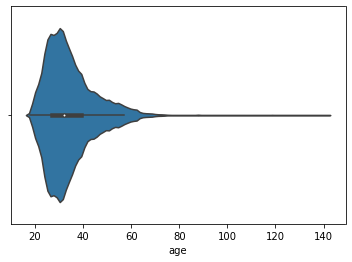

In [19]:
sb.violinplot(data=bike, x='age');

In [20]:
bike.drop(index = bike.query('age > 60').index, inplace=True)

**The age of population who use Ford GoBike service is spread between (25–40 years)**<br>**The distribution is Right Skewed**

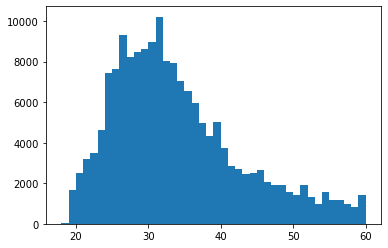

In [21]:
bins = np.arange(18, 60+1, 1)
plt.hist(bike['age'], bins=bins);

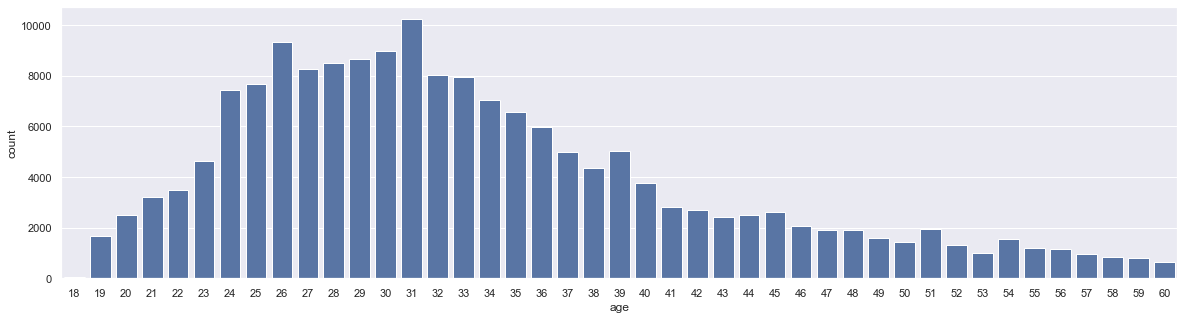

In [40]:
color = sb.color_palette()[0]
sb.countplot(data = bike, x ='age', color=color)
sb.set(rc = {'figure.figsize':(20,5)});

### Which gender use it more ?

**Males are using the service 50% more than Females**<br>
**there are 74% of members are Male and 24% are Females and just 3% are other**

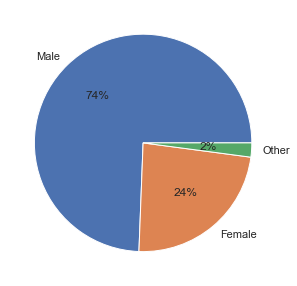

In [23]:
#https://stackabuse.com/matplotlib-pie-chart-tutorial-and-examples/
count = bike['member_gender'].value_counts()
labels = count.index
plt.pie(count, labels=labels, autopct='%.0f%%');

### Which are the famous routes? Top 10 Routes

The most used route is <span style=color:blue>Berry St at 4th St </span>TO <span style=color:blue>San Francisco Ferry Building (Harry Bridges Plaza)</span> with 337 Trip


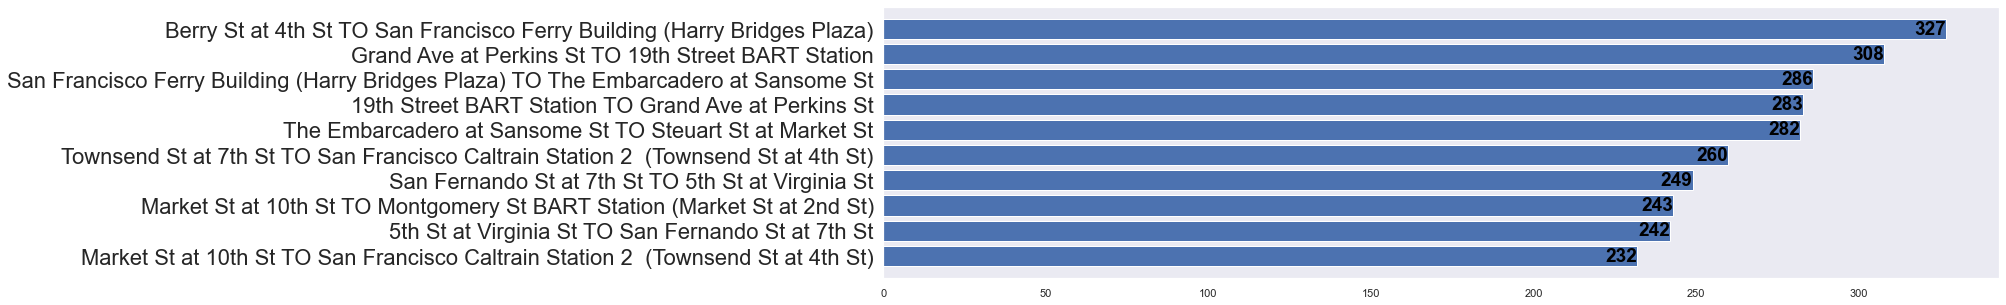

In [24]:
#https://stackoverflow.com/questions/34076177/matplotlib-horizontal-bar-chart-barh-is-upside-down

plt.barh(route.index[:10], width = route.values[:10])
plt.grid()
plt.gca().invert_yaxis()
plt.yticks(fontsize=22)
for i, v in enumerate(route[:10]):
    plt.text(v , i, str(v), color='black', fontweight='bold', fontsize=19, ha='right', va='center');

### What is the famous starting station?

In [25]:
start = bike['start_station_name'].value_counts()
bike['start_station_name'].value_counts()[:3]

Market St at 10th St                                         3626
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3314
Berry St at 4th St                                           2880
Name: start_station_name, dtype: int64

**The Famous statrting station is Market St at 10th St**

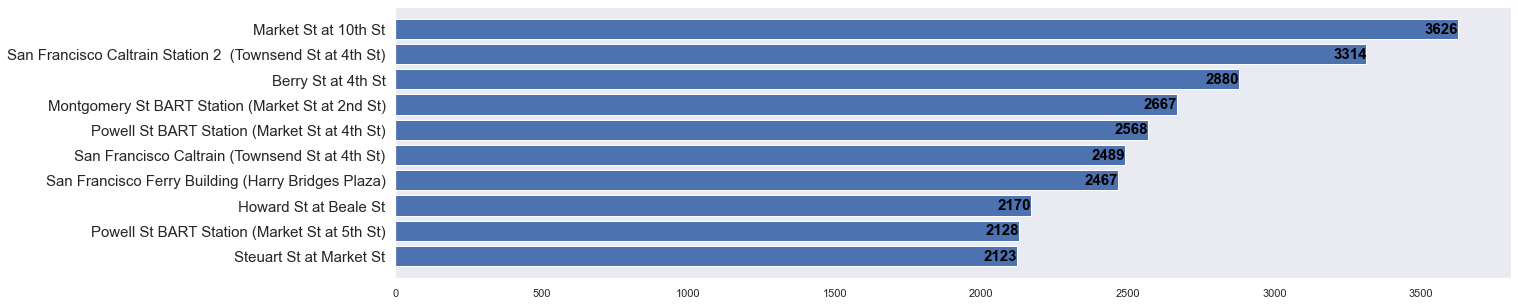

In [26]:
plt.barh(start.index[:10], width = start.values[:10])
plt.grid('')
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
for i, v in enumerate(start[:10]):
    plt.text(v , i, str(v), color='black', fontweight='bold', fontsize=15, ha='right', va='center');

### What is the famous destination station?

In [27]:
end = bike['end_station_name'].value_counts()
bike['end_station_name'].value_counts()[:3]

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4552
Market St at 10th St                                         3676
Montgomery St BART Station (Market St at 2nd St)             3397
Name: end_station_name, dtype: int64

**The Famous starting station is San Francisco Caltrain Station 2  (Townsend St at 4th St)**

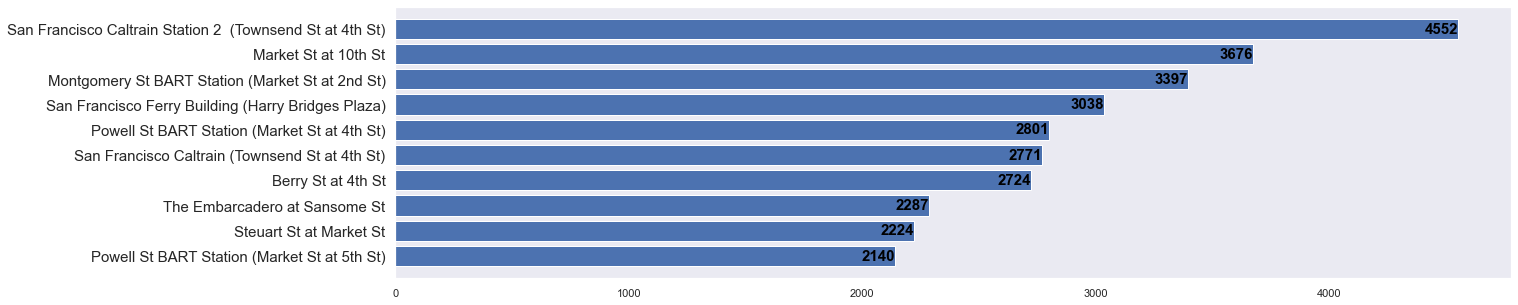

In [28]:
plt.barh(end.index[:10], width = end.values[:10])
plt.grid('')
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
for i, v in enumerate(end[:10]):
    plt.text(v , i, str(v), color='black', fontweight='bold', fontsize=15, ha='right', va='center');

### What time of the day do users use this service? 

**The distribution is Bi-Modal: 8 AM and 5 PM Maybe because this time is work hours**

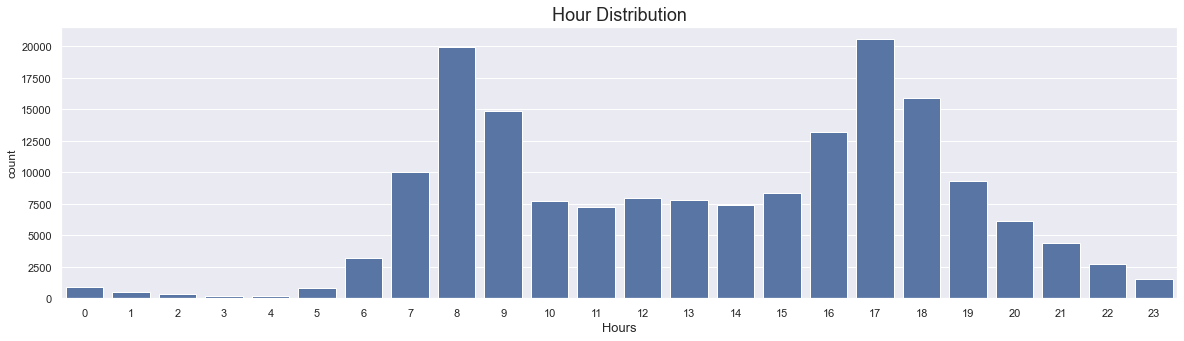

In [29]:
color = sb.color_palette()[0]
sb.countplot(data=bike, x='hour', color=color)
sb.set(rc = {'figure.figsize':(20,5)})
plt.xlabel('Hours', {'fontsize':13})
plt.title('Hour Distribution', {'fontsize': 18});

### Which day has more load than others ?

**Thursday has more load than others**

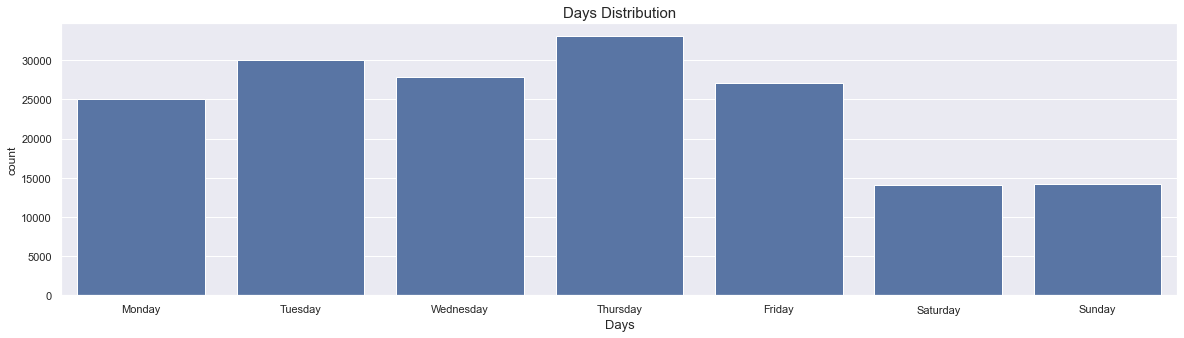

In [30]:
sb.countplot(data=bike, x='day', color=color)
plt.xlabel('Days',{'fontsize':13})
plt.title('Days Distribution',{'fontsize':15});

###  When is the service often used? (weekdays vs. weekends)

**there are 92% of members use it in Weekday maybe they are commuters and 8% are using it in Weekend**

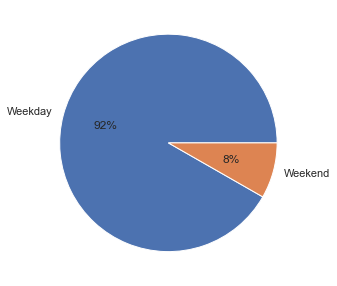

In [31]:
count = bike['day_type'].value_counts()
labels = count.index
plt.pie(count, labels=labels, autopct='%.0f%%');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I am interested in the features that describe the difference between User Type and their behaviour. These are age, gender, duration, days and hours .

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* Most of users is between (25-40) and 74% of them are males
* 92% of users use the service in Weekdays
* The serivce is used more in work hours (7AM to 7PM)
* The most used station as a Start station is (Market St at 10th St) and the most used station as a Destination is (San Francisco Caltrain Station 2  (Townsend St at 4th St)), Despite that the most used Route is (Berry St at 4th St) TO (San Francisco Ferry Building (Harry Bridges Plaza))

<br><br>
#### I made some changes on data
1. I created a new feature from member birth column which is Age<br>
        a. transfered member birth column from float to int type to calculate Age Did this because it's easier to use and visualize
        b. Most of individuals are below 60 with outliers above 80, therefore I will remove any records with age above 60
2. start_time column transfered it's type from string to datetime type and extracted from it new columns Day and Day type to make analysis on them<br>
3. duration_sec  calculated trip duration in minutes becauese it's easier to understand and visualize<br>
4. user_type and member_gender columns transfered their type to categorical<br>
5. made new column (Route) from start_station_name and end_station_name columns to analyze the most used route<br>
 

In [32]:
bike.head(1)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,route,age,day,day_type,hour,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,Montgomery St BART Station (Market St at 2nd S...,35,Thursday,Weekday,17,869.75


<a id='bivariate_exploration'></a>

## Bivariate Exploration

### Gender Vs Age

**The most of Females that use this service is about 30**
**and Males is between middle of 20s and start of 30s**<br>

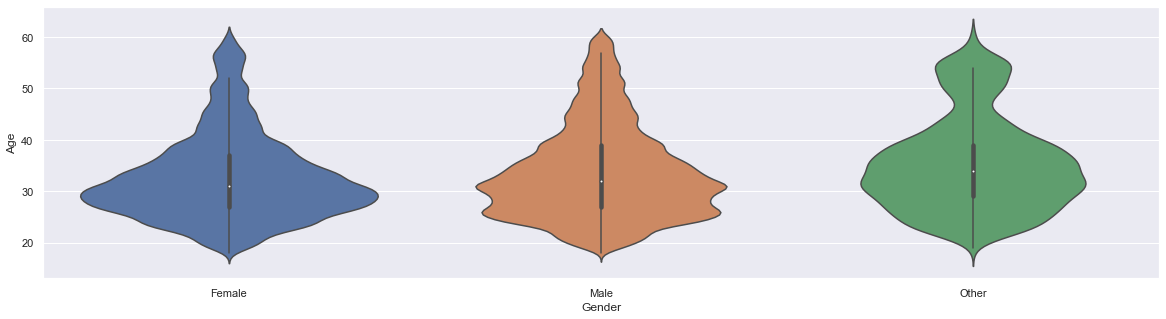

In [33]:
sb.violinplot(data=bike, x='member_gender', y='age')
plt.xlabel('Gender')
plt.ylabel('Age');

 ### What are the characteristics of Customers vs. Subscribers?

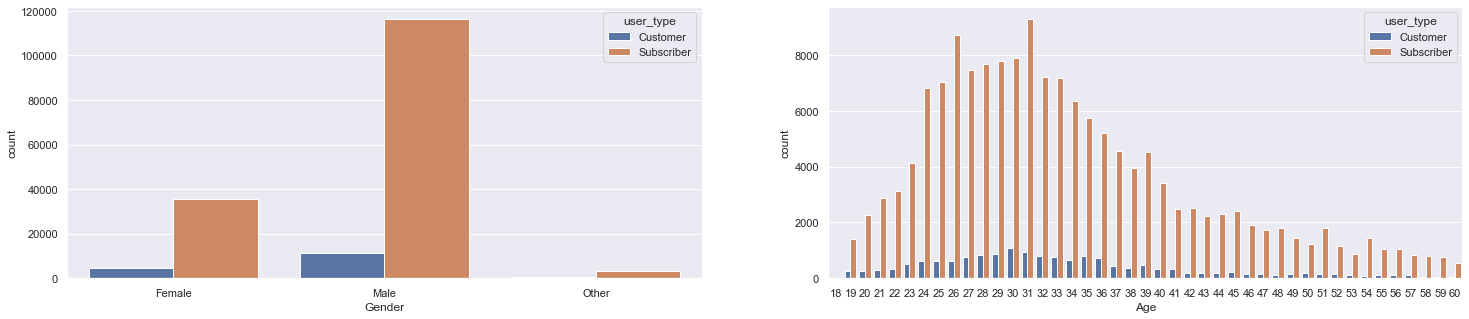

In [34]:
plt.figure(figsize=[25,5])

plt.subplot(1,2,1)
sb.countplot(data=bike, x='member_gender' , hue='user_type')
plt.xlabel('Gender')

plt.subplot(1,2,2)
sb.countplot(data = bike, x ='age', hue='user_type')
plt.xlabel('Age');

The plots show 
* that Males use the service more in both user types
* in age 30s is the dominant in both     

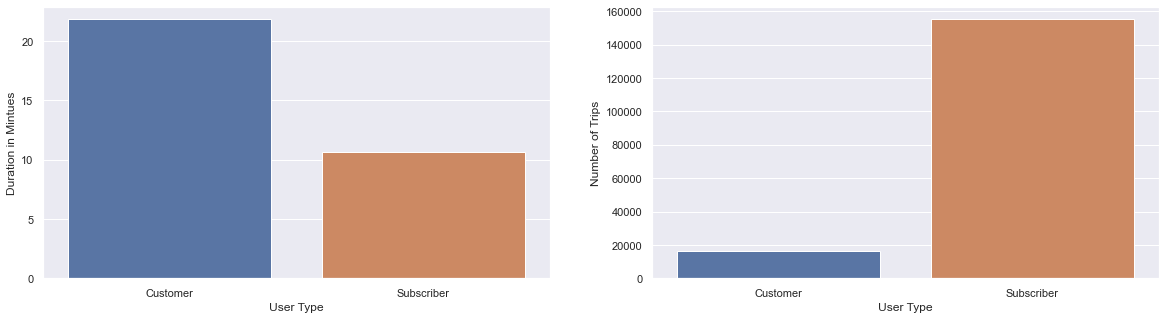

In [35]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
sb.barplot(data =bike, y='duration_min', x='user_type', ci=None)
plt.ylabel('Duration in Mintues')
plt.xlabel('User Type')

plt.subplot(1,2,2)
sb.countplot(data=bike, x='user_type')
plt.ylabel('Number of Trips')
plt.xlabel('User Type');

Plots here shows that Subscribers use GoBike more but for short trips, in contrast Customers use it less but for long trips

### Is there a relation between Age and Duration

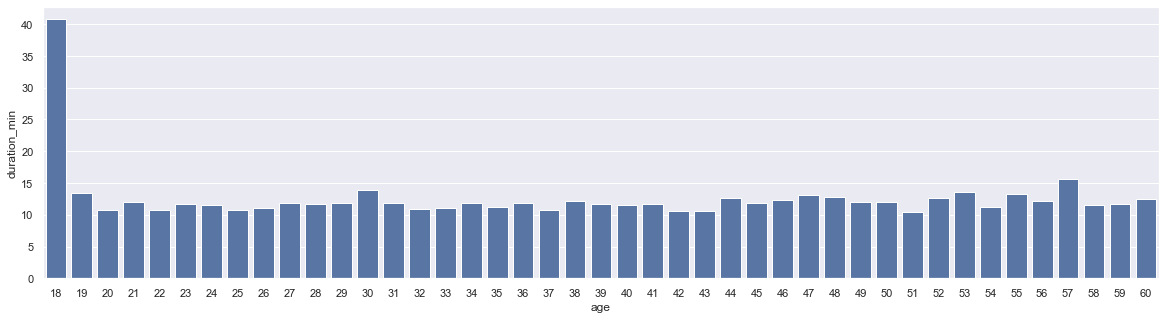

In [36]:
sb.barplot(data = bike, x = 'age', y = 'duration_min', ci=0,color=color);

there is one peak at age 18 but for other ages all of them about 15 minutes trip duration 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* Subscribers use GoBike more but for short trips, in contrast Customers use it less but for long trips
* Males use the service more in both user types
* and 30s is the dominant in both user type

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* The most of Females that use this service is about 30 and Males is between middle of 20s and start of 30s<br>
* Most of members don't exceed the average 15 minute trip duration except at age 18 it exceeds average 40 minute

<a id='multivariate_exploration'></a>

## Multivariate Exploration

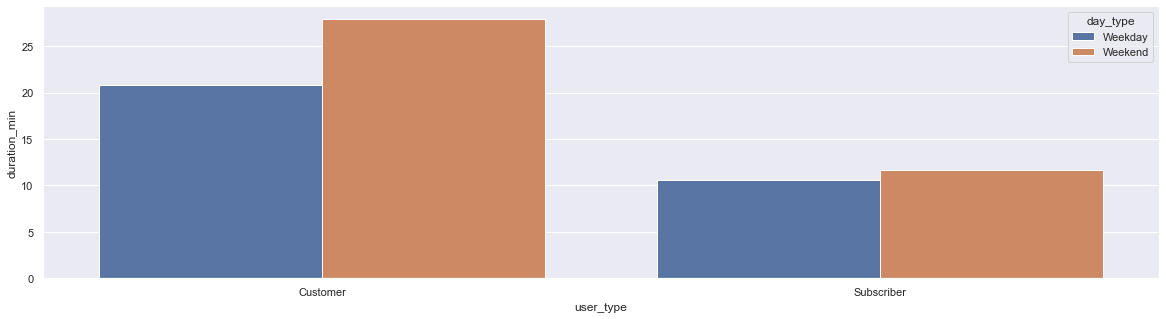

In [37]:
sb.barplot(data = bike, x = 'user_type', y = 'duration_min', hue='day_type', ci=0);

Both user types are using GoBike for longer duration in Weekend but the mean difference between day type in Customer type more than Subscriber type 

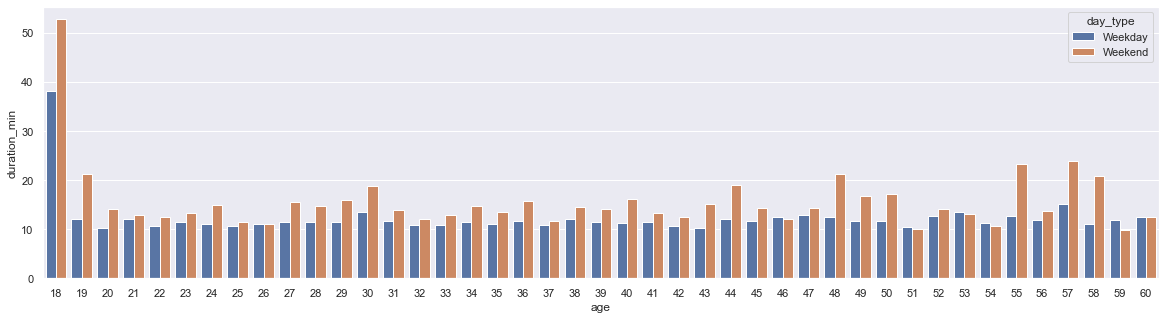

In [38]:
sb.barplot(data = bike, x = 'age', y = 'duration_min', hue='day_type', ci=0);

Most ages use it at weekends in average for longer duration

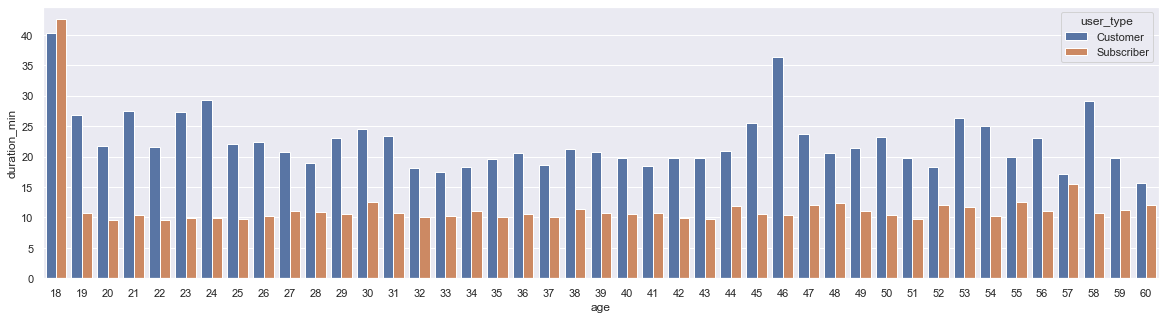

In [39]:
sb.barplot(data = bike, x = 'age', y = 'duration_min',hue='user_type', ci=0);

Here most subscribers their trips about 15 Mintues except 18 years old exceeds 40 mintues, and also 18 years old in Customer segment exceeds the highest duration that older take and in Customer Segment there are two peaks at 46 and 18 years old they exceed 30 minutes that other ages don't reach it 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


* Most of Subscribers their trips are between 10 and 15 Mintues except 18 years old exceeds 40 mintues, and also 18 years old in Customer segment exceeds the highest duration that older take
  * that supports that Customers use GoBike for longer duration

* Most of ages they use GoBike in Weekend for longer duration trips except some ages in 50
* both user types Customer and Subscriber use GoBike in weekend for longer duration trips
  * that supports members use GoBike in Weekend for longer duration trips 
 

### Were there any interesting or surprising interactions between features?

> That members use GoBike service in weekend for longer duration trips maybe for sport

## Conclusions

**Users Characteristics**
* The age of population who use Ford GoBike service is spread between (25–40 years)
* There are 74% of members are Male and 24% are Females and just 3% are other
* The most of Females that use this service is about 30 and Males is between middle of 20s and start of 30s

**Times**
* The most of users use it between 8 AM and 5 PM Maybe because this time is work hours
* Thursday has more load than other days
* There are 92% of members use it in Weekday maybe they are commuters and 8% are using it in Weekend
* Most ages use it at weekends in average for longer duration

**User Types**
* Males use the service more in both user types and in age 30 years old is the dominant in both user types
* Subscribers use GoBike more but for short trips, in contrast Customers use it less but for long trips
* Both user types are using GoBike for longer duration in Weekend but the mean difference between day type in Customer type more than Subscriber type 

**Stations and Routes**
* The most used route is <span style=color:blue>Berry St at 4th St </span>TO <span style=color:blue>San Francisco Ferry    Building (Harry Bridges Plaza)</span>
* The most used statrting station is Market St at 10th St
* The most used starting station is San Francisco Caltrain Station 2  (Townsend St at 4th St)

In [41]:
bike.to_csv("bike_cleaned.csv",index=False)